In [ ]:
import pandas as pd # type: ignore
from sklearn.metrics import accuracy_score # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore
import tensorflow as tf # type: ignore
from tensorflow.keras.layers import Dense, Dropout # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore

df = pd.read_csv('ncaa_stats.csv')
df.dropna(axis=1, thresh=100, inplace=True)

feature_columns = [col for col in df.columns if col not in ['Team', 'Year', 'Winner/Target']]
past_data = df[df['Winner/Target'] != 2]
current_year_data = df[df['Winner/Target'] == 2].copy()

X = past_data[feature_columns]
y = past_data['Winner/Target']
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

y_pred = (model.predict(X_test) > 0.5).astype(int)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

current_X_scaled = scaler.transform(current_year_data[feature_columns])
current_year_data['Raw_Probability'] = model.predict(current_X_scaled)
current_year_data['Win_Probability'] = (current_year_data.groupby('Year')['Raw_Probability'].transform(lambda x: x / x.sum())) * 100

pd.set_option('display.max_rows', 10000)
display(current_year_data[['Year', 'Team', 'Win_Probability']].sort_values(['Year', 'Win_Probability'], ascending=[True, False]))

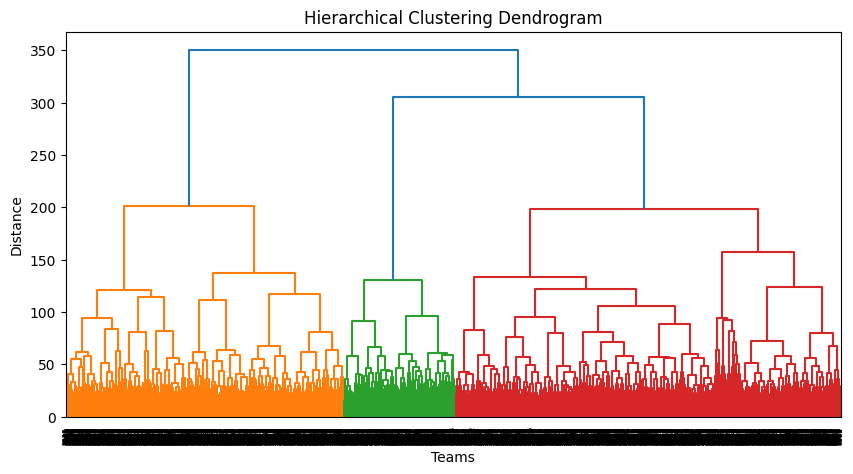

,Year,Team,Cluster
38,2011,binghamton,0
83,2011,kent-state,0
112,2011,dayton,0
172,2011,bryant,0
379,2011,cleveland-state,0
462,2011,east-carolina,0
478,2011,arkansas-state,0
480,2011,fresno-state,0
487,2011,albany-ny,0
534,2011,north-carolina-state,0


In [1]:
import pandas as pd # type: ignore
from sklearn.cluster import AgglomerativeClustering # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv('ncaa_stats.csv')
df.dropna(axis=1, thresh=100, inplace=True)

# Define features and filter data
feature_columns = [col for col in df.columns if col not in ['Team', 'Year', 'Winner/Target']]
current_year_data = df.copy()

# Check if data exists before proceeding
if current_year_data.empty:
    print("No teams found with Winner/Target == 2. Exiting.")
else:
    # Standardize the data
    scaler = StandardScaler()
    current_X_scaled = scaler.fit_transform(current_year_data[feature_columns])

    # Apply Hierarchical Clustering
    num_clusters = 10  # Adjust as needed
    clustering = AgglomerativeClustering(n_clusters=num_clusters)
    current_year_data['Cluster'] = clustering.fit_predict(current_X_scaled)

    # Plot Dendrogram
    plt.figure(figsize=(10, 5))
    sch.dendrogram(sch.linkage(current_X_scaled, method='ward'))
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Teams")
    plt.ylabel("Distance")
    plt.show()

    # Display clustered teams
    pd.set_option('display.max_rows', 10000)
    display(current_year_data[['Year', 'Team', 'Cluster']].sort_values(['Year', 'Cluster']))


In [2]:
current_year_data[current_year_data['Team'] == 'auburn']

,Unnamed: 0,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,TOV%.3,USG%.3,OWS.3,DWS.3,WS.3,WS/40.3,Team,Year,Winner/Target,Cluster
162,162,32.0,40.3,26.90,61.55,0.4370,18.15,37.30,0.4860,8.75,...,44.7,30.6,1.6,0.0,1.3,0.261,auburn,2017,0,1
293,293,27.0,40.4,27.00,61.80,0.4375,18.85,36.65,0.5150,8.20,...,40.0,33.3,1.7,0.2,1.6,0.178,auburn,2021,0,3
779,779,31.0,41.0,25.30,59.85,0.4230,17.70,35.75,0.4975,7.55,...,66.7,48.5,2.1,0.4,2.2,0.240,auburn,2020,0,1
882,882,31.0,40.2,25.10,59.60,0.4205,17.00,35.95,0.4695,8.15,...,66.7,26.8,0.9,0.5,1.0,0.296,auburn,2016,0,1
1490,1490,31.0,40.5,21.75,52.90,0.4120,15.80,34.85,0.4585,5.95,...,66.7,25.7,1.5,0.4,1.8,0.138,auburn,2011,0,7
2303,2303,23.0,40.0,26.70,60.15,0.4420,18.85,37.40,0.5045,7.80,...,66.7,31.8,1.2,0.3,1.5,0.247,auburn,2025,0,3
2865,2865,35.0,40.0,25.65,59.30,0.4310,18.70,38.25,0.4900,6.95,...,51.3,29.7,2.4,0.9,3.2,0.275,auburn,2024,0,1
3189,3189,35.0,40.4,23.50,53.90,0.4365,17.00,34.65,0.4880,6.55,...,33.3,31.2,2.6,0.0,2.0,0.132,auburn,2015,0,0
3408,3408,40.0,40.4,25.45,57.40,0.4435,15.75,30.65,0.5140,9.75,...,100.0,50.5,2.4,0.4,2.4,2.236,auburn,2019,0,5
3555,3555,34.0,40.1,24.45,57.75,0.4230,18.35,37.60,0.4885,6.05,...,26.7,33.9,1.9,0.6,2.5,0.204,auburn,2023,0,0
